In [20]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD

In [21]:
#path = r"C:\Users\sonia\Documents\Document\2022-2023\Projet 3I - Deep Learning\dataset_clean.csv"
path="/Users/maellemarcelin/Documents/sudria/Ingé3/projet/dataset_clean.csv"
TARGET = 'Label'
df = pd.read_csv(path)
nombre_de_valeurs = df["Label"].value_counts()
print(nombre_de_valeurs)

1    22506
0     2241
Name: Label, dtype: int64


In [22]:
#Extrait des colonnes a utiliser pour la prédiction, "Label" correspond à la variable cible binaire (0 ou 1).
df = df[['Init_Win_bytes_forward',
'Total Length of Fwd Packets',
'Bwd Header Length',
'Destination Port',
'Subflow Fwd Bytes',
'Packet Length Std',
'Packet Length Variance',
'Bwd Packets/s',
'Average Packet Size',
'Bwd Packet Length Std',
         "Label"]]


#Création de deux ensembles de données, une classe positive (label=1) et une classe négative (label=0).
df_b = df[df['Label']==1]
df_a = df[df['Label']==0]

#Sélection d'un nombre fixe d'instances de la classe positive (pour éviter le déséquilibre) et 
#concatène les deux ensembles de données en un seul dataframe.
df_b= df_b[0:2241]

#Mélange aléatoire
df = pd.concat([df_a, df_b], axis=0)

#Variable cible "y" extraite et transformée en "one-hot encoding" (encodage catégorique) 
#pour être compatible avec la fonction d'activation "sigmoid" du modèle.
df = df.sample(frac=1)


y = df[TARGET]
X = df.drop([TARGET],axis=1)

y = y.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X.shape[1]))
print(df["Label"].value_counts())

1    2241
0    2241
Name: Label, dtype: int64


In [25]:
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Shape of training data: (3585, 1, 10)
Shape of testing data: (897, 1, 10)


## Model

In [26]:
model = Sequential()

#0.9342
#model.add(Dense(32, input_shape=(1, 10), activation="relu"))
#model.add(Dense(64, activation="relu"))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())

#0.9275 avec batch_size=16
#model.add(Dense(32, input_shape=(1, 10), activation="relu"))
#model.add(Dense(64, activation="relu"))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())

#0.9208
#model.add(Dense(32, input_shape=(1, 10), activation="relu", kernel_regularizer=regularizers.l1(0.001)))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

#model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.001)))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

#model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.001)))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

#model.add(Flatten())
#model.add(Dense(y.shape[1], activation='sigmoid'))

#######
#model.add(Dense(32, input_shape=(1, 10), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.2))

#model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.2))

#model.add(Dense(128, activation="relu"))

#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())
#########
model.add(Dense(32, input_shape=(1, 10), activation="relu",kernel_initializer='he_uniform'))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(y.shape[1], activation='sigmoid'))
model.add(Flatten())
########

#model.add(Dense(32, input_shape=(1, 10), activation="relu", kernel_regularizer=regularizers.l1(0.001)))
#model.add(Dropout(0.5)) # Ajout de Dropout, pourcentage de neurones à désactiver aléatoirement pendant l'apprentissage
#model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.001)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.001)))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())


#0.9331
#model.add(Dense(32, input_shape=(1, 10), activation="relu"))
#model.add(Dropout(0.3)) # Ajout de Dropout, pourcentage de neurones à désactiver aléatoirement pendant l'apprentissage
#model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.3)) # Ajout de Dropout
#model.add(Dense(128, activation="relu"))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())

#0.9309
#model.add(Dense(32, input_shape=(1, 10,), activation="relu"))
#model.add(Dense(64, activation="tanh"))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())


model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 32)             352       
                                                                 
 dense_10 (Dense)            (None, 1, 32)             1056      
                                                                 
 dense_11 (Dense)            (None, 1, 32)             1056      
                                                                 
 dense_12 (Dense)            (None, 1, 32)             1056      
                                                                 
 dense_13 (Dense)            (None, 1, 2)              66        
                                                                 
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
Total params: 3,586
Trainable params: 3,586
Non-traina

In [27]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", 
                                        patience = 10, 
                                        restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    epochs = 25, 
                    batch_size=16,
                    validation_data= (X_test, y_test),
                    callbacks =[earlystopping])
history

Epoch 1/25
225/225 [==============================] - 1s 2ms/step - loss: 0.4592 - accuracy: 0.7810 - val_loss: 0.3575 - val_accuracy: 0.8439
Epoch 2/25
225/225 [==============================] - 0s 860us/step - loss: 0.3150 - accuracy: 0.8619 - val_loss: 0.2890 - val_accuracy: 0.9019
Epoch 3/25
225/225 [==============================] - 0s 844us/step - loss: 0.2541 - accuracy: 0.8753 - val_loss: 0.2343 - val_accuracy: 0.9119
Epoch 4/25
225/225 [==============================] - 0s 864us/step - loss: 0.2176 - accuracy: 0.9046 - val_loss: 0.2264 - val_accuracy: 0.9287
Epoch 5/25
225/225 [==============================] - 0s 849us/step - loss: 0.2090 - accuracy: 0.9113 - val_loss: 0.2028 - val_accuracy: 0.9264
Epoch 6/25
225/225 [==============================] - 0s 852us/step - loss: 0.1990 - accuracy: 0.9155 - val_loss: 0.1969 - val_accuracy: 0.9331
Epoch 7/25
225/225 [==============================] - 0s 877us/step - loss: 0.1900 - accuracy: 0.9219 - val_loss: 0.1710 - val_accuracy: 0

In [28]:
accuracy = model.evaluate(X_test, y_test)
accuracy 

29/29 [==============================] - 0s 520us/step - loss: 0.1322 - accuracy: 0.9465


[0.13220086693763733, 0.9464883208274841]

### On vérifie la sortie test

In [10]:
print(y_test)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:
import warnings
warnings.filterwarnings("ignore") 

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score 

## modèle de base pour la recherche des paramètres optimaux 

def create_model(activation='relu', number_of_neurons=256, number_of_layers=2, init_mode='uniform'):
    model = Sequential()
    model.add(Dense(32, input_shape=(1, 10),kernel_initializer=init_mode, activation=activation))
    for i in range(number_of_layers):
        model.add(Dense(number_of_neurons, activation=activation))
    model.add(Dense(y.shape[1], activation='sigmoid'))
    model.add(Flatten())
    
    model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    
    return model

skmodel = KerasClassifier(build_fn=create_model) 

params = {'activation':['relu', 'tanh'], 
          'batch_size':[4, 8, 16, 32, 64],
          'epochs':[20, 50, 100, 200, 500],
          'init_mode':['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
          'number_of_layers':[3,5,7,9,11],
          'number_of_neurons':[8,16,32,64,128,256]
}

random_search = RandomizedSearchCV(skmodel, param_distributions=params, cv=5, n_jobs=-1)

random_search_results = random_search.fit(X_train, y_train, verbose=0) 
print("Best: {} using {}".format(np.round(random_search_results.best_score_,4), random_search_results.best_params_))

180/180 [==============================] - 0s 541us/step - loss: 0.6931 - accuracy: 0.4993
Best: 0.9565 using {'number_of_neurons': 32, 'number_of_layers': 3, 'init_mode': 'he_uniform', 'epochs': 200, 'batch_size': 4, 'activation': 'relu'}


In [19]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from keras.wrappers.scikit_learn import KerasClassifier


def create_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(1, 10), activation="relu",kernel_initializer='he_uniform'))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(y.shape[1], activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    return model

# Create a KerasClassifier with the optimal hyperparameters retrieved previsouly
sk_model = KerasClassifier(build_fn=create_model)

# calculate the cross-validation and return folds accuracy 
acc_scores = cross_val_score(sk_model, X_train, y_train, cv=5, n_jobs=-1)

# Question 11
# Print folds mean accuracy
print('The mean accuracy of folds is:', np.round(acc_scores.mean(),4))

# Print folds accuracy standard deviation
print('The standard deviation of folds accuracy is:', np.round(acc_scores.std(),4))

23/23 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7838


2023-03-14 17:43:56.111382: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-14 17:43:56.111484: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-14 17:43:56.111383: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


23/23 [==============================] - 0s 903us/step - loss: 0.4440 - accuracy: 0.7992
The mean accuracy of folds is: 0.8229
The standard deviation of folds accuracy is: 0.0268


In [14]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from keras.wrappers.scikit_learn import KerasClassifier


def create_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(1, 10), activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(y.shape[1], activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    return model

# Create a KerasClassifier with the optimal hyperparameters retrieved previsouly
sk_model = KerasClassifier(build_fn=create_model)

# calculate the cross-validation and return folds accuracy 
acc_scores = cross_val_score(sk_model, X_train, y_train, cv=5, n_jobs=-1)

# Question 11
# Print folds mean accuracy
print('The mean accuracy of folds is:', np.round(acc_scores.mean(),4))

# Print folds accuracy standard deviation
print('The standard deviation of folds accuracy is:', np.round(acc_scores.std(),4))

/var/folders/z5/4lrt7z4s6g74tkj4yy2vd75w0000gn/T/ipykernel_8934/1677329432.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  sk_model = KerasClassifier(build_fn=create_model)


23/23 [==============================] - 0s 932us/step - loss: 0.3984 - accuracy: 0.8326
The mean accuracy of folds is: 0.8354
The standard deviation of folds accuracy is: 0.0244


### Le print montre que les étiquettes sont codées en vecteurs binaires (one-hot encoded). 
### Donc chaque ligne du tableau est un exemple et chaque colonne correspond à une classe (donc 2). Si la valeur de la colonne est 1, l'exemple appartient à cette classe.

### Chte donne une exemple: pour la première ligne on a [0, 1], donc on a 100% de chance que la réponse soit 1.
### En gros, ce que tu vois là, c'est les probabilités.

### ça transforme notre problème binaire en problème multilabel.
### Pour y remedier, on a juste à convertir

In [136]:
y_pred = model.predict(X_test)

y_test_binary = np.argmax(y_test, axis=1)
y_pred_binary = np.argmax(y_pred, axis=1)

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary, pos_label=0)
acc = accuracy_score(y_test_binary, y_pred_binary)


#Mesure de la capacité du modèle à classer correctement tous les exemples
print("Acc : ", acc)

#Mesure la capacité du modèle à classer correctement les exemples positifs
print("Précision : ", precision)

#Mesure la capacité du modèle à classer correctement les exemples négatifs
print("Rappel : ", recall)


29/29 [==============================] - 0s 2ms/step
Acc :  0.9264214046822743
Précision :  0.9558823529411765
Rappel :  0.9607843137254902


## Test du modèle avec la fonction attacked()

In [137]:
def attacked(model, Destination_Port,
             Total_Length_of_Fwd_Packets,
             Bwd_Packet_Length_Std,
             Bwd_Header_Length,
             Bwd_Packets_s,
             Packet_Length_Std,
             Packet_Length_Variance,
             Average_Packet_Size,
             Subflow_Fwd_Bytes,
             Init_Win_bytes_forward,               
               ):
    #model = pickle.load(open('model_detection_attack.sav', 'rb'))

    x = np.array([Init_Win_bytes_forward,
                  Total_Length_of_Fwd_Packets,
                  Bwd_Header_Length,
                  Destination_Port,
                  Subflow_Fwd_Bytes,
                  Packet_Length_Std,
                  Packet_Length_Variance,
                  Bwd_Packets_s,
                  Average_Packet_Size,
                  Bwd_Packet_Length_Std
                  ]).reshape(1, 1, 10)
    

    print(model.predict(x))
    #print(model.predict_proba(x))

In [138]:
a = attacked(model, 80, 371, 1754.831473, 200, 0.060958398,1460.1010199999994,2131894.989,920.4615385,371,274
)

#On donne la réponse sous la même forme de la colonne label
b = np.argmax(a)
print(b)

1/1 [==============================] - 0s 24ms/step
[[1. 0.]]
0


## Graphiques

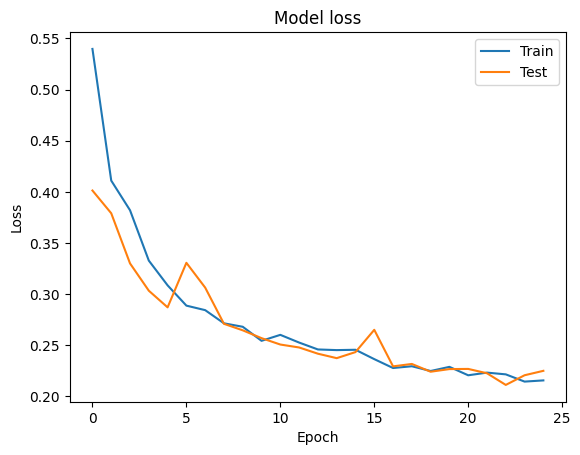

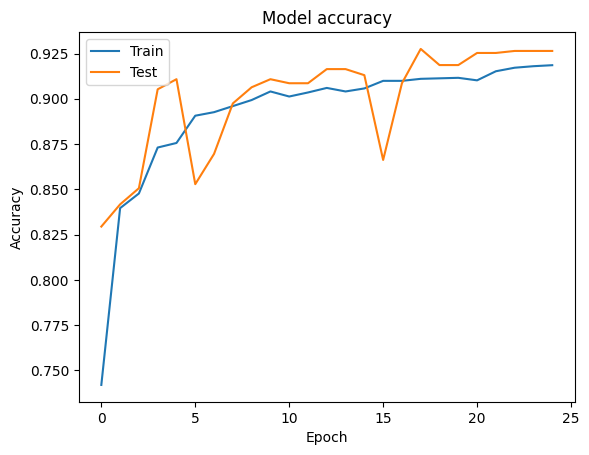

In [139]:
# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])